<a href="https://colab.research.google.com/github/RGithub23/SeabornShowcasePenguins/blob/main/seaborn_showcase_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Seaborn Showcase — Palmer Penguins

We'll use **Seaborn** with the **Palmer Penguins** (Built-in Dataset) to practice clear, question‑driven visuals.
No downloads required: `sns.load_dataset("penguins")`.

**Columns (selected):**
- Categorical: `species` (Adelie, Chinstrap, Gentoo), `island`, `sex`
- Numeric: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`


In [1]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


This code block:

Loads the Penguins dataset that comes bundled with Seaborn.

Shows the first 5 rows so you can see what the data looks like before analysis.

* seaborn as sns Seaborn is a plotting library built on top of Matplotlib, with built-in datasets.

* pandas as pd For data handling.  

* matplotlib.pyplot as plt For plotting.

sns.load_dataset("penguins")

* Loads the Palmer Penguins dataset, which is a popular open dataset used in data visualization tutorials.

* It contains measurements of penguins observed in Antarctica.

Typical columns:

* species - Adelie, Chinstrap, Gentoo

island - Island location (Dream, Torgersen, Biscoe)

* bill_length_mm, bill_depth_mm → Beak size measurements

* flipper_length_mm - Flipper length

body_mass_g - Penguin weight

* sex - Male/Female

penguins.head()

* Displays the first 5 rows of the dataset.


## 1) Data quality check (missing values)


In [2]:

penguins.info()
penguins.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


This code block is performing a data quality check on the penguins dataset, specifically looking for missing values.

penguins.info()

* Prints a concise summary of the DataFrame:

* Number of rows and columns

* Each column’s name and data type

* Number of non-null values (so you can see which columns have missing values).

penguins.isna().sum()

* Checks for NaN (missing) values in each column.

isna() creates a boolean mask (True if missing).

.sum() counts how many missing values per column.








## 2) Average flipper length by species (bar)
> Question: Which species tends to have the longest flippers?


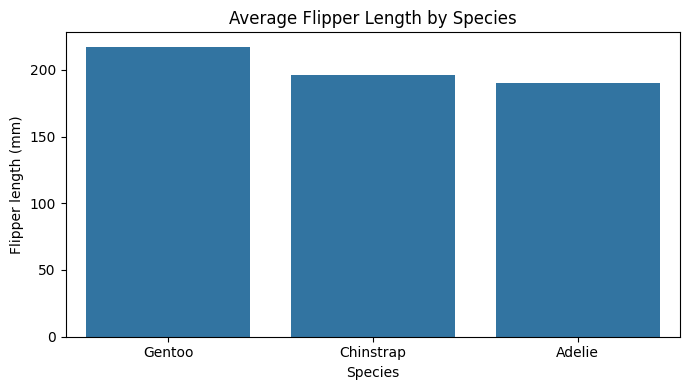

In [3]:

avg_flipper = penguins.groupby('species', as_index=False)['flipper_length_mm'].mean().sort_values('flipper_length_mm', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=avg_flipper, x='species', y='flipper_length_mm')
plt.title('Average Flipper Length by Species')
plt.xlabel('Species'); plt.ylabel('Flipper length (mm)')
plt.tight_layout()
plt.show()


This code block is calculating the average flipper length of penguins by species and then plotting it as a bar chart.

penguins.groupby('species')...mean()

*  Groups the dataset by species (Adelie, Chinstrap, Gentoo).

Calculates the mean flipper length for each species.

.sort_values('flipper_length_mm')

*  Sorts the results so species are ordered by average flipper length (shortest → longest).

sns.barplot(...)

*  Creates a bar chart showing the average flipper length for each species.

X-axis: species

Y-axis: average flipper length (mm)

Labels & layout

Title: "Average Flipper Length by Species"

X-axis: "Species"

Y-axis: "Flipper length (mm)"

tight_layout() ensures the plot fits neatly.








## 3) Bill length vs bill depth (scatter, colored by species)
> Question: Do species form distinct clusters in bill measurements?


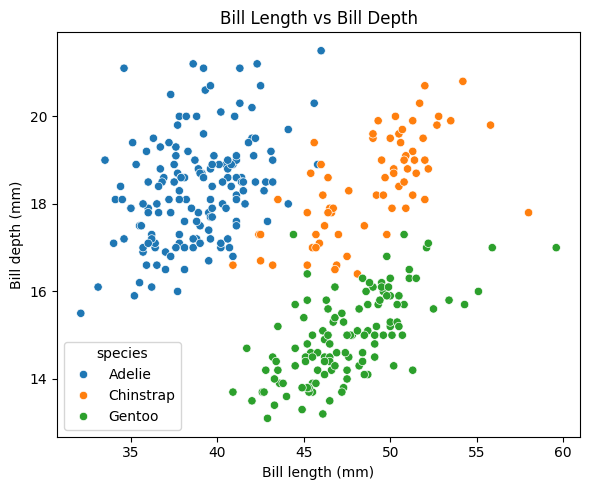

In [4]:

plt.figure(figsize=(6,5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill length (mm)'); plt.ylabel('Bill depth (mm)')
plt.tight_layout()
plt.show()


This code block is making a scatter plot of penguin bill measurements, with points colored by species.

plt.figure(figsize=(6,5))

*  Sets the figure size to 6×5 inches.

sns.scatterplot(...)

*  Plots bill length (mm) on the X-axis.

*  Plots bill depth (mm) on the Y-axis.

*  Uses hue='species' to color the points differently for Adelie, Chinstrap, and Gentoo penguins.

Titles and labels

Title: "Bill Length vs Bill Depth"

X-axis: "Bill length (mm)"

Y-axis: "Bill depth (mm)"

plt.show()

Displays the scatter plot.







## 4) Body mass by sex (boxplot)
> Question: How do body mass distributions differ between sexes?


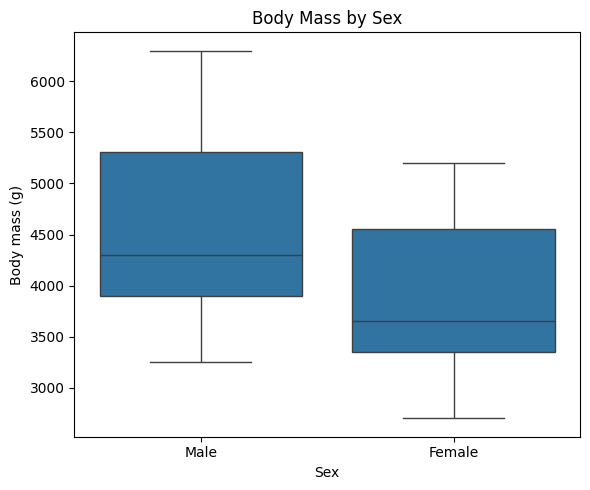

In [5]:

plt.figure(figsize=(6,5))
sns.boxplot(data=penguins, x='sex', y='body_mass_g')
plt.title('Body Mass by Sex')
plt.xlabel('Sex'); plt.ylabel('Body mass (g)')
plt.tight_layout()
plt.show()


This code block is making a boxplot of penguin body mass, split by sex.

plt.figure(figsize=(6,5))

* Creates a figure 6×5 inches in size.

sns.boxplot(...)

* Draws a boxplot with:

* X-axis = sex (Male, Female)

* Y-axis = body_mass_g (penguin body weight in grams)

A boxplot shows:

* The median (middle line inside the box)

* The interquartile range (IQR) (the box itself)

* Whiskers (range of most values)

* Outliers (dots beyond whiskers)

Labels and title

Title: "Body Mass by Sex"

X-axis: "Sex"

Y-axis: "Body mass (g)"

plt.show()

* Displays the chart.



   




## 5) Island vs body mass (strip/swarm)
> Question: Are there island-level differences in body mass?


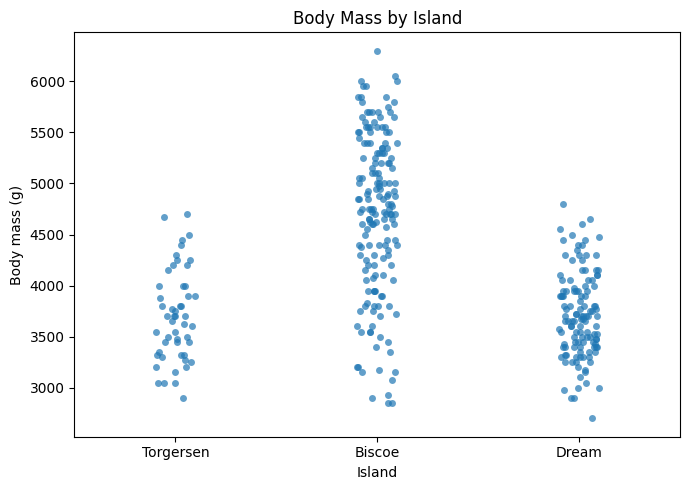

In [6]:

plt.figure(figsize=(7,5))
sns.stripplot(data=penguins, x='island', y='body_mass_g', jitter=True, alpha=0.7)
plt.title('Body Mass by Island')
plt.xlabel('Island'); plt.ylabel('Body mass (g)')
plt.tight_layout()
plt.show()


This code block is making a strip plot that shows individual penguin body mass values across different islands.

plt.figure(figsize=(7,5))

*  Sets the figure size to 7×5 inches.

sns.stripplot(...)

*  Creates a strip plot:

*  X-axis = island (Dream, Biscoe, Torgersen).

*  Y-axis = body_mass_g (penguin body weight).

*  Each point represents an individual penguin.

*  jitter=True → spreads points slightly left/right to avoid overlap.

*  alpha=0.7 → makes points slightly transparent, so dense regions are easier to see.

Labels and title

Title: "Body Mass by Island"

X-axis: "Island"

Y-axis: "Body mass (g)"

plt.show()

*  Displays the visualization.








## 6) Pairplot on numeric columns (hue=species)
> Question: Which features separate species best?


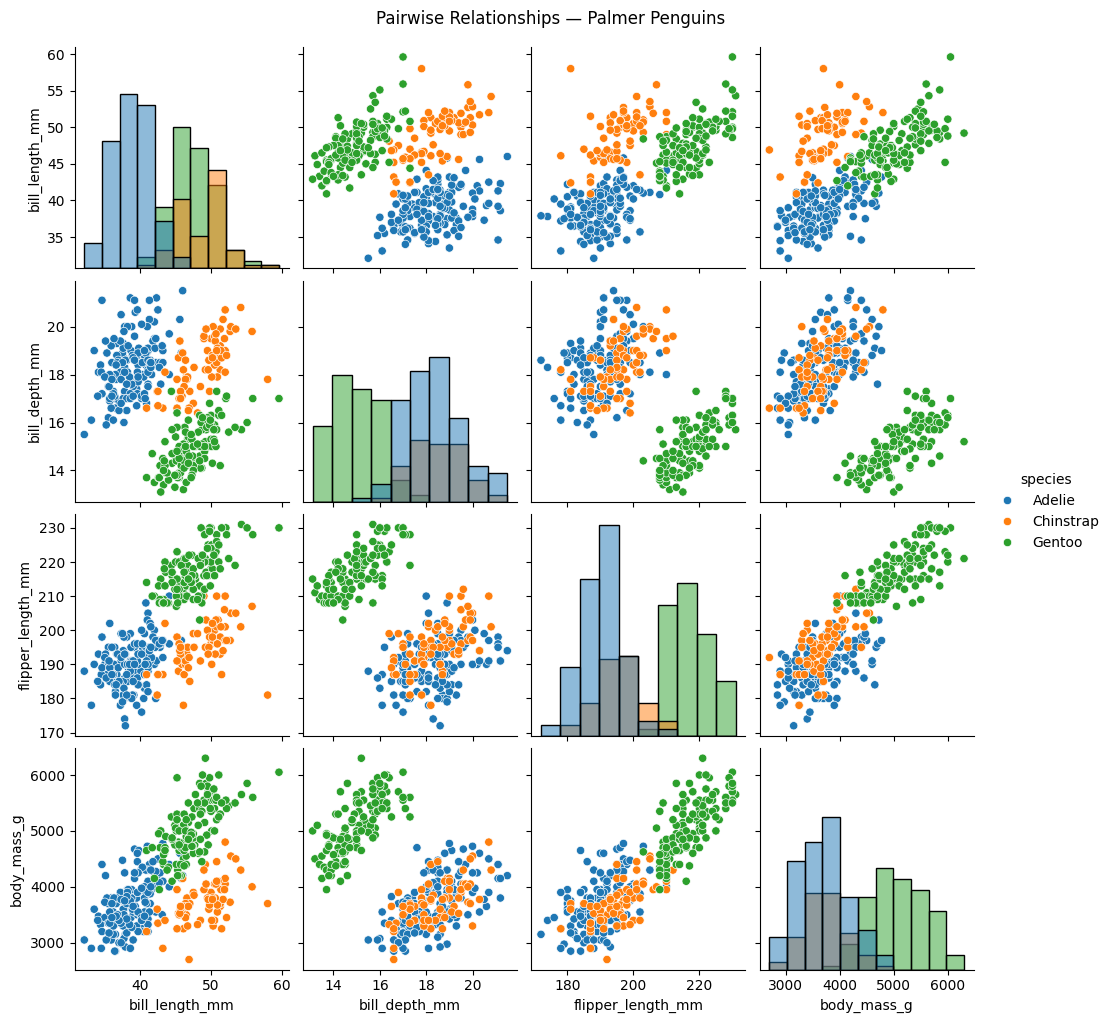

In [7]:

num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
sns.pairplot(penguins[num_cols + ['species']].dropna(), hue='species', diag_kind='hist')
plt.suptitle('Pairwise Relationships — Palmer Penguins', y=1.02)
plt.show()


This code block is creating a pairplot (also known as a scatterplot matrix) of the penguin dataset, showing pairwise relationships between numerical features, colored by species.

num_cols = [...]

* Selects the numerical columns to include in the pairplot:

* bill_length_mm

* bill_depth_mm

* flipper_length_mm

* body_mass_g

penguins[num_cols + ['species']].dropna()

* Keeps only the selected numeric columns + species.

* Drops rows with missing values (dropna()), since pairplots can’t handle NaNs.

sns.pairplot(..., hue='species', diag_kind='hist')

* Creates a grid of scatterplots showing pairwise relationships between features.

* Colors points by species (Adelie, Gentoo, Chinstrap).

* On the diagonal: histograms (diag_kind='hist') of each individual variable.

plt.suptitle(...)

* Adds a main title above the figure:
"Pairwise Relationships – Palmer Penguins".

plt.show()

* Displays the figure.








## Conclusion
- **Flipper length** clearly differs across species.
- **Bill dimensions** show species clusters.
- **Sex** and **island** provide additional context for body mass.
- Pairwise views highlight which features are most discriminative.


